In [1]:
import math
import random

def lcm(a,b):
    return int(abs(a * b) / math.gcd(a,b) if a and b else 0)

def exfract(a,b):
    gcdab = math.gcd(a, b)
    a /= gcdab
    b /= gcdab
    mult = random.randrange(2,15)
    return (int(a), int(b), mult, int(a*mult), int(b*mult))

if __name__=="__main__":
    for i in range(4):
        a = random.randrange(2,20)
        b = random.randrange(2,20)
        print('fraction ', exfract(a, b))

fraction  (11, 18, 9, 99, 162)
fraction  (2, 7, 6, 12, 42)
fraction  (3, 2, 10, 30, 20)
fraction  (9, 7, 9, 81, 63)


In [2]:
# memory game

class mem:
    
    def __init__(self, msize=3):
        self._max_word_size = 8
        self._matrix_size = msize
        self._selected_values = [(1,2), (0,1)]
        self._board = [['a_word', False] for j in range(self._matrix_size**2)]

    def show_board(self):
            fmt_str = "{:^%d}" % self._max_word_size
            print(fmt_str.format(""), end=" ")
            for i in range(self._matrix_size):
                print(fmt_str.format(i + 1), end=" ")
            print()
            for i in range(self._matrix_size):
                print(fmt_str.format(chr(ord("A") + i)), end=" ")
                for j in range(self._matrix_size):
                    cell_index = i * self._matrix_size + j
                    if (i, j) in self._selected_values or self._board[cell_index][1]:
                        print(fmt_str.format(self._board[cell_index][0]), end=" ")
                    else:
                        print(fmt_str.format("---"), end=" ")
                print()
                
ms = int(input('Please enter bord size:'))
mymem = mem(ms)
mymem.show_board()

Please enter bord size:5
            1        2        3        4        5     
   A       ---     a_word    ---      ---      ---    
   B       ---      ---     a_word    ---      ---    
   C       ---      ---      ---      ---      ---    
   D       ---      ---      ---      ---      ---    
   E       ---      ---      ---      ---      ---    


In [1]:
# tetration

def tet(al):
    '''tetration for given list 3^2^3 = [3,2,3]'''
    cex = al[len(al)-1]
    for i in range(len(al)-2,-1,-1):
        cex = al[i]**cex
    return cex

print(tet([3,2,3]))

6561


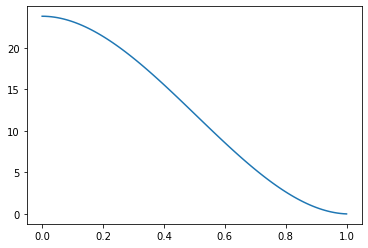

In [104]:
# https://stackoverflow.com/questions/65118930/how-do-i-set-the-proper-boundary-conditions-in-solve-bvp

import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt

# constants
D = 200.6
v = 0.02
k = 0.20

# split second order ODE into 2 first order ODEs
'''def sulfate_profile(U, z):
    print(U, z)
    dUdz = [U[1], (v*U[1] + U[0]/(U[0]+k))/D]
    print(dUdz)
    return dUdz'''

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_bvp.html
def sulfate_profile(z, S): # compare to doc: x->z, y->S
    return np.vstack((S[1], v/D*S[1] + S[0]/(S[0]+k)/D))

def fun(z, S, p):
    k0, k1 = p[0], p[1]
    return np.vstack((S[1], k0*S[1] + k1*S[0]/(S[0]+k)))

# I initiated these boundary conditions but I don't really know what they mean...
def bc(S0, S1):
    return np.array([S0[0], S1[0]])

def bc1(S0, S1, p):
    k0 = p[0]
    return np.array([S0[0], S1[0], S0[1] - k0*23.8/(23.8+k), S1[0]]) # Sn: n=0 boundary a, n=1 boundary b; [0] = y, [1] = y',...

z_list = np.linspace(0, 100, 100)
S_a = np.zeros((2, z_list.size))
S_a[0, 0] = 23.8
S_a[0, 99] = 0 # b-boundary which is inf

# solve SO4 concentration ODE over depth range (z_list)
#sulfate_reduction = solve_bvp(sulfate_profile, bc, z_list, S_a)
sulfate_reduction = solve_bvp(fun, bc1, z_list, S_a, p=[1,1])

#print(sulfate_reduction)
x_plot = np.linspace(0, 1, 100)
y_plot_a = sulfate_reduction.sol(x_plot)[0]
plt.plot(x_plot, y_plot_a, label='sulfate_b_dpth')
plt.show()

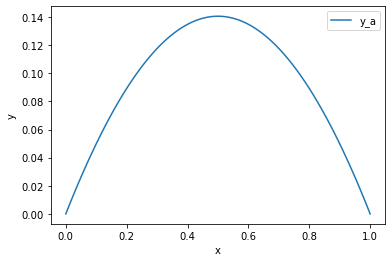

In [55]:
import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt

def fun(x, y):
    return np.vstack((y[1], -np.exp(y[0])))

def bc(ya, yb):
    return np.array([ya[0], yb[0]])

x = np.linspace(0, 1, 5)
y_a = np.zeros((2, x.size))
y_b = np.zeros((2, x.size))
y_b[0] = 3

res_a = solve_bvp(fun, bc, x, y_a)

x_plot = np.linspace(0, 1, 100)
y_plot_a = res_a.sol(x_plot)[0]
plt.plot(x_plot, y_plot_a, label='y_a')
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

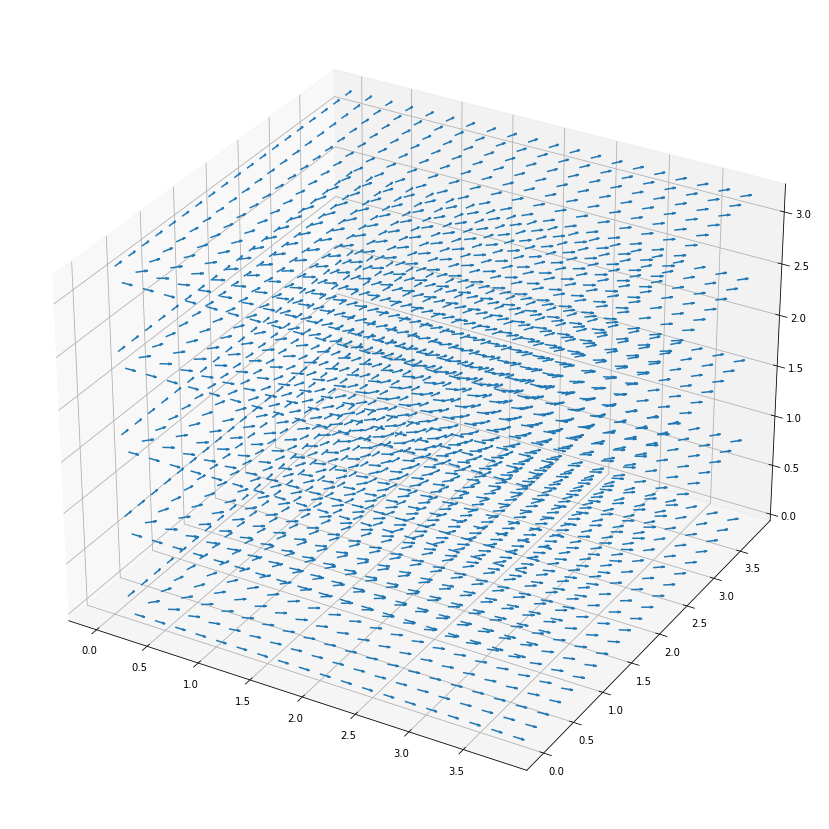

In [88]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

# constants
D = 200.6
v = 0.02
ks = 0.20

fig = plt.figure(figsize=(25,15))
ax = fig.gca(projection='3d')


# Make the grid
x, y, z = np.meshgrid(np.arange(0, 4, 0.2),
                      np.arange(0, 4, 0.2),
                      np.arange(0, 4, 0.8))

# Make the direction data for the arrows
'''u = np.sin(np.pi * x) * np.cos(np.pi * y) * np.cos(np.pi * z)
v = -np.cos(np.pi * x) * np.sin(np.pi * y) * np.cos(np.pi * z)
w = (np.sqrt(2.0 / 3.0) * np.cos(np.pi * x) * np.cos(np.pi * y) *
     np.sin(np.pi * z))'''

u = x # y
v = y # y'
w = v/D*y + x / (x+ks) / D # y''

ax.quiver(x, y, z, u, v, w, length=0.1, normalize=True)

plt.show()

6.2832946004643215


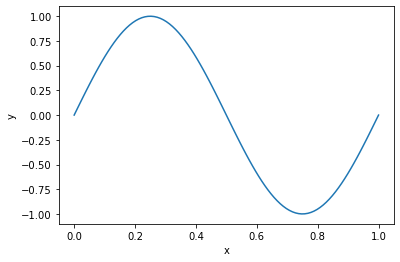

In [90]:
# solves y'' + k**2 * y = 0, y(0) = y(1) = 0, y'(0) = k

import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt

def fun(x, y, p):
    k = p[0]
    return np.vstack((y[1], -k**2 * y[0]))

def bc(ya, yb, p):
    k = p[0]
    return np.array([ya[0], yb[0], ya[1] - k]) # y(0) = y(1) = 0, y'(0) = k

x = np.linspace(0, 1, 5)
y = np.zeros((2, x.size))
y[0, 1] = 1
y[0, 3] = -1

sol = solve_bvp(fun, bc, x, y, p=[6])
print(sol.p[0])

x_plot = np.linspace(0, 1, 100)
y_plot = sol.sol(x_plot)[0]
plt.plot(x_plot, y_plot)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

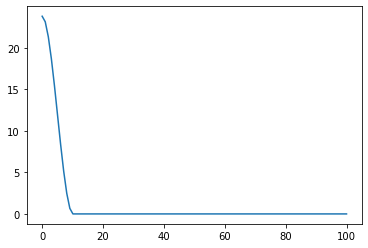

In [4]:
# https://stackoverflow.com/questions/65118930/how-do-i-set-the-proper-boundary-conditions-in-solve-bvp

import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt

# constants
D = 200.6
v = 0.02
k = 0.20

# split second order ODE into 2 first order ODEs
'''def sulfate_profile(U, z):
    print(U, z)
    dUdz = [U[1], (v*U[1] + U[0]/(U[0]+k))/D]
    print(dUdz)
    return dUdz'''

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_bvp.html
def sulfate_profile(z, S): # compare to doc: x->z, y->S
    return np.vstack((S[1], v/D*S[1] + S[0]/(S[0]+k)/D))

def fun(z, S, p):
    k0, k1 = p[0], p[1]
    return np.vstack((S[1], k0*S[1] + k1*S[0]/(S[0]+k)))

# I initiated these boundary conditions but I don't really know what they mean...
def bc(S0, S1):
    return np.array([S0[0], S1[0]])

def bc1(S0, S1, p):
    k0 = p[0]
    return np.array([S0[0], S1[0], S0[1] - k0*23.8/(23.8+k), S1[0]]) # Sn: n=0 boundary a, n=1 boundary b; [0] = y, [1] = y',...

z_list = np.linspace(0, 1000, 100)
S_a = np.zeros((2, z_list.size))
S_a[0, 0] = 23.8
S_a[0, 99] = 0 # b-boundary which is inf

# solve SO4 concentration ODE over depth range (z_list)
#sulfate_reduction = solve_bvp(sulfate_profile, bc, z_list, S_a)
sulfate_reduction = solve_bvp(fun, bc1, z_list, S_a, p=[1,1])

#print(sulfate_reduction)
x_plot = np.linspace(0, 100, 100)
y_plot_a = sulfate_reduction.sol(x_plot)[0]
plt.plot(x_plot, y_plot_a, label='sulfate_b_dpth')
plt.show()

In [13]:
import re 
my_string = "FirstName001 LastName001" 

new_string = re.sub('\d', '', my_string) 
print(new_string)

new_string = re.sub('FirstName|LastName', '', my_string) 
print(new_string)


FirstName LastName
001 001


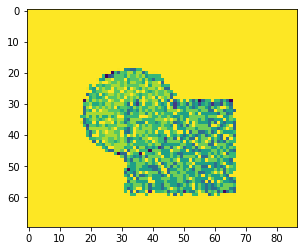

In [9]:
# https://stackoverflow.com/questions/65144804/stochastic-sampling-for-image-processing

from PIL import Image
import numpy as np
from matplotlib.pyplot import imshow

# load the image and convert to greyscale
image = Image.open('imglrg0.jpg').convert('LA')
# convert image to numpy array
img_lrg = np.asarray(image)
#imshow(img_lrg)

factor = 8

# New smaller image
img_small = np.zeros((img_lrg.shape[0] // factor, img_lrg.shape[1] // factor),
                     dtype=np.int64)

fkrnl = np.zeros((img_lrg.shape[0] // factor, img_lrg.shape[1] // factor),
                     dtype=np.int64)

# Loop over the rows of the smaller image
for i in range(img_small.shape[0]):
    # Loop over the columns of the smaller image
    for j in range(img_small.shape[1]):
        # The input patch should consist of rows from factor * i to
        # factor * (i + 1) - 1, and columns from factor * j to
        # factor * (j + 1) - 1

        # input_patch = img[  # Extract the input patch
        input_patch = img_lrg[i * factor:(i+1) * factor - 1, j * factor:(j+1) * factor - 1]

        # Can use np.random.choice(input_patch.flatten(), ...) to choose random
        # pixels from input_patch

        # img_small[i, j] =  # Set the output pixel
        #img_small[i, j] = np.random.choice(input_patch.flatten())
        img_small[i, j] = np.average(np.random.choice(input_patch.flatten(), 3))

imshow(np.asarray(img_small))

1
0.0
10
1.4407407407407409
100
1.5388686868686865
1000
1.5488895562228897
3000
1.549641198918158


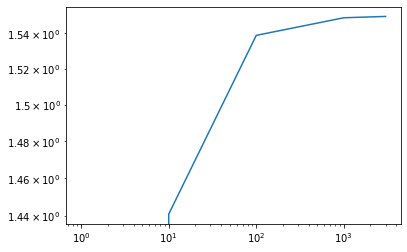

In [31]:
# https://stackoverflow.com/questions/65157955/the-mean-distance-of-the-nodes-increases-by-log-of-the-number-of-nodes-python

from itertools import combinations, groupby
import random
from numpy import array
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

# from https://stackoverflow.com/questions/61958360/how-to-create-random-graph-where-each-node-has-at-least-1-edge-using-networkx
def gnp_random_connected_graph(n, p):
    """
    Generates a random undirected graph, similarly to an Erdős-Rényi 
    graph, but enforcing that the resulting graph is conneted
    """
    edges = combinations(range(n), 2)
    G = nx.Graph()
    G.add_nodes_from(range(n))
    if p <= 0:
        return G
    if p >= 1:
        return nx.complete_graph(n, create_using=G)
    for _, node_edges in groupby(edges, key=lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < p:
                G.add_edge(*e)
    return G

def run_experiment(ns, p=0.45, iters=30):
    """
    p: probability of having an edge between a pair of nodes
    ns: sequence of `number of nodes(n)` to try
    iters: number of times to run for each `n`
    
    """
    G = {}
    shortestPath={}
    res = []
    for n in ns:
        print(n)
        for i in range(iters):
            #G[i] = nx.gnp_random_graph(n, p)
            G[i] = gnp_random_connected_graph(n, p)
            shortestPath[i] = nx.average_shortest_path_length(G[i], weight=None, method=None)
        means = array([shortestPath[k] for k in shortestPath]).mean()
        print(means)
        res.append(means)
    return np.array(res)

ns = [1,10, 100, 1000, 3000]
res = run_experiment(ns)

dictionary = dict(zip(ns, res))
plt.plot(list(dictionary.keys()),list(dictionary.values()))
plt.yscale('log')
plt.xscale('log')

In [18]:

def fill_area(mat, ij, val):
    '''set patch around ij in mat to val for all positions where the original mat value == mat val at ij, full patch''' 
    return [[val if abs(i-ij[0])<2 and abs(j-ij[1])<2 and mat[i][j] == mat[ij[0]][ij[1]] 
             else mat[i][j] for j in range(len(mat[1]))] for i in range(len(mat))]

def fill_area1(mat, ij, val):
    '''set patch around ij in mat to val for all positions where the original mat value == mat val at ij, patch ij-dir''' 
    return [[val if ((abs(i-ij[0])<2 and j==ij[1]) or (abs(j-ij[1])<2 and i==ij[0])) and mat[i][j] == mat[ij[0]][ij[1]] 
             else mat[i][j] for j in range(len(mat[1]))] for i in range(len(mat))]

matrix = [[2, 0, 1],
          [0, 0, 1],
          [0, 1, 1]]

print('entire patch: ', fill_area(matrix, (1, 0), 3))
print('ij-directional: ', fill_area1(matrix, (1, 0), 3))

#matrix = [[2, 0, 1],
#         [3, 3, 1],
#         [3, 1, 1]]

entire patch:  [[2, 3, 1], [3, 3, 1], [3, 1, 1]]
ij-directional:  [[2, 0, 1], [3, 3, 1], [3, 1, 1]]


In [2]:
from cmath import exp, pi
 
def fft(x):
    N = len(x)
    if N <= 1: return x
    even = fft(x[0::2])
    odd =  fft(x[1::2])
    T= [exp(-2j*pi*k/N)*odd[k] for k in range(N//2)]
    return [even[k] + T[k] for k in range(N//2)] + \
           [even[k] - T[k] for k in range(N//2)]
 
print( ' '.join("%5.3f" % abs(f) 
                for f in fft([1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0])) ) 

4.000 2.613 0.000 1.082 0.000 1.082 0.000 2.613


In [20]:
import os
from collections import namedtuple

text = """Jimothy Donovan
Guitar
California
20.6.2018
The frame is broken
ENDREMARK
Hank Pym
Daniel Bennet
X
Isaac Newton
Hourglass
San Jose
12.8.2019
The hourglass is not accurate anymore
would like replacement
ENDREMARK
Daniel Bennet
Ethan Cole
X"""

lines = iter(text.split("\n"))    # create iterator (get data from the file)

customerData = dict()
while True:
    username = next(lines,None)
    if not username: break
    customerData[username]        = userData    = dict()
    userData["item"]              = next(lines)
    userData["location"]          = next(lines)
    userData["date-of-purchase"]  = next(lines)
    userData["remarks"]           = remarks     = list()
    userData["salespeople"]       = salespeople = set()
    while True:
        remark = next(lines)
        if remark == "ENDREMARK": break
        remarks.append(remark)
    while True:
        salesperson = next(lines)
        if salesperson == "X": break
        salespeople.add(salesperson)
        
print(customerData)

{'Jimothy Donovan': {'item': 'Guitar', 'location': 'California', 'date-of-purchase': '20.6.2018', 'remarks': ['The frame is broken'], 'salespeople': {'Daniel Bennet', 'Hank Pym'}}, 'Isaac Newton': {'item': 'Hourglass', 'location': 'San Jose', 'date-of-purchase': '12.8.2019', 'remarks': ['The hourglass is not accurate anymore', 'would like replacement'], 'salespeople': {'Ethan Cole', 'Daniel Bennet'}}}


In [21]:
import re
from robobrowser import RoboBrowser

# Browse to Rap Genius
browser = RoboBrowser(history=True)
browser.open('http://rapgenius.com/')

# Search for Queen
form = browser.get_form(action='/search')
form                # <RoboForm q=>
form['q'].value = 'queen'
browser.submit_form(form)

# Look up the first song
songs = browser.select('.song_name')
browser.follow_link(songs[0])
lyrics = browser.select('.lyrics')
lyrics[0].text      # \n[Intro]\nIs this the real life...

# Back to results page
browser.back()

# Look up my favorite song
browser.follow_link('death on two legs')

# Can also search HTML using regex patterns
lyrics = browser.find(class_=re.compile(r'\blyrics\b'))
lyrics.text         # \n[Verse 1]\nYou suck my blood like a leech...

ModuleNotFoundError: No module named 'robobrowser'

In [30]:
def split_on(lst, val):
    try:
        # get a tuple between the start of lst and the second occurrence of val
        first_idx = lst.index(val)
        remainder = lst[first_idx + 1:]
        second_idx = remainder.index(val) + (first_idx + 1)
        # and recur with the rest of the list beyond the first occurrence
        return [tuple(lst[:second_idx])] + split_on(remainder, val)
    except ValueError: 
        # base case: there's zero or one occurrences of val, 
        # so we just return the whole lst as a tuple
        return [tuple(lst)]

split_on([2,1,1,2,1,2,1,1], 2)
# [(2, 1, 1), (1, 1, 2, 1), (1, 2, 1, 1)]

[(2, 1, 1), (1, 1, 2, 1), (1, 2, 1, 1)]

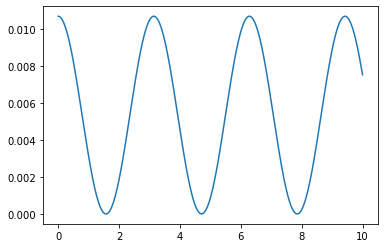

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy import special

def j_l(l,k):
    return sp.special.spherical_jn(l, k)
    #return np.ndarray

def j_l1(l,k):
    return sp.special.spherical_jn(l, k, True)
    #return np.ndarray

def n_l(l, k):
    return sp.special.spherical_yn(l, k)
    #return np.ndarray

def n_l1(l, k):
    return sp.special.spherical_yn(l, k, True)
    #return np.ndarray

def delta_l(k_1, k_2,r, l):
    return np.arctan(np.divide(k_1*np.divide(j_l1(l, k_1), j_l(l ,k_1))*j_l(l, k_2)-k_2*r*j_l1(l, k_2),
              (k_1*np.divide(j_l1(l,k_1), j_l(l,k_1))*n_l(l, k_2)-k_2*r*n_l1(l, k_2))))

def dcross(l,t,k_2,k_1):
    return (1/k_2*(2*l+1)*np.exp(delta_l(k_1,k_2,2,l))*np.sin(delta_l(k_1,k_2,2,l))*sp.special.lpmv(0, l, np.cos(t)))**2


t=np.linspace(0, 10, 10000)
fig = plt.figure()

plt.plot(t,dcross(1,t,1,0.5))
#fig.savefig('dcross.png')

plt.show()

In [11]:
# integer square root

def isqrt(x):
    '''integer square root'''
    q = 1
    while q <= x:
        q *= 4
    z = x
    r = 0
    while q > 1:
        q //= 4
        t = z - r - q
        r //= 2
        if t >= 0:
            z = t
            r += q
    return r

print(isqrt(22), isqrt(35), isqrt(16), isqrt(1))

4 5 4 1


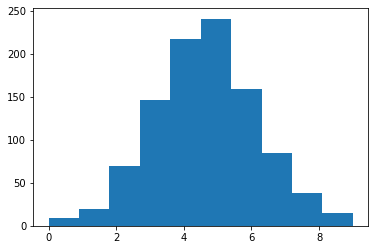

In [3]:
import numpy as np
import matplotlib.pyplot as plt

size = 1000
seed = np.random.seed(0)
normal = np.round(np.random.normal(loc=0.0, scale=1000, size=(size)), 1).astype(int)

d=10
data = np.ndarray.flatten(np.asarray(normal, dtype=int))

interval = np.divide(np.max(data)-np.min(data), d)
intervals = np.arange(np.min(data), np.max(data), interval, dtype=int)

data_d = np.zeros_like(data)

for x in range(len(data)):
    for z in range(d-1):
        if data[x] >= intervals[z] and data[x] < intervals[z+1]:
            data_d[x] = z
        elif data[x] > intervals[-1]:
            data_d[x] = d-1
            
plt.hist(data_d)
plt.show()

In [15]:
# unique binary tree node numbering

# paths as binary numbers
test_d = {'d1':  [0, 1, 0, 1, 1, 0],
          'd2':  [1, 0, 0, 0, 0, 1],
          'd3':  [1, 0, 1, 1, 1, 1],
          'd4':  [1, 1, 1, 1, 1, 0],
          'd5':  [0, 1, 0, 1, 1, 1],
          'd6':  [0, 0, 0, 1, 1, 1],
          'd7':  [0, 0, 1, 1, 0, 1],
          'd8':  [0, 0, 0, 1, 0, 1],
          'd9':  [0, 0, 1, 0, 0, 1],
          'd10': [0, 0, 1, 1, 0, 0],
          'd11': [1, 0, 1, 1, 1, 0]}

# most similar paths:
# paths that have the most number of same nodes with the right paths, right paths are paths from the tree (test_d)
MAX = [([0, 1, 0, 1, 1, 0], [1, 0, 0, 0, 0, 1]),
       ([1, 0, 0, 0, 0, 1], [1, 0, 1, 1, 1, 1]),
       ([1, 0, 0, 0, 0, 1], [1, 1, 1, 1, 1, 0]),
       ([0, 1, 0, 1, 1, 0], [0, 1, 0, 1, 1, 1]),
       ([0, 1, 0, 1, 1, 0], [0, 0, 0, 1, 1, 1]),
       ([0, 0, 0, 1, 1, 1], [0, 0, 1, 1, 0, 1]),
       ([0, 0, 0, 1, 1, 1], [0, 0, 0, 1, 0, 1]),
       ([0, 0, 1, 1, 0, 1], [0, 0, 1, 0, 0, 1]), # problem
       ([0, 0, 1, 1, 0, 1], [0, 0, 1, 1, 0, 0]), # problem
       ([1, 0, 1, 1, 1, 1], [1, 0, 1, 1, 1, 0])] # problem

init_v = list(range(1, len(MAX[0][0])+1))
ind_d = {'i1': init_v}
same_path = True 
count = len(MAX[0][0])

for i in range(0, len(MAX)):
    temp = []
    left = MAX[i][0]
    right = MAX[i][1]

    for j in range(len(left)):
        if right[j] == left[j] and same_path==True:
            for k in range(len(MAX)):
                if left == test_d['d1']:
                    IND = 0
                elif left == MAX[k][1]:
                    # print("True")
                    IND = MAX.index(MAX[k]) + 1
                    break
            # IND = MAX.index((left, HALF))
            temp.append(ind_d['i'+str(IND+1)][j])
        else:
            count += 1
            temp.append(count)
            same_path = False
        
    ind_d['i'+str(i+2)] = temp
    same_path=True
print(ind_d)

{'i1': [1, 2, 3, 4, 5, 6], 'i2': [7, 8, 9, 10, 11, 12], 'i3': [7, 8, 13, 14, 15, 16], 'i4': [7, 17, 18, 19, 20, 21], 'i5': [1, 2, 3, 4, 5, 22], 'i6': [1, 23, 24, 25, 26, 27], 'i7': [1, 23, 28, 29, 30, 31], 'i8': [1, 23, 24, 25, 32, 33], 'i9': [1, 23, 28, 34, 35, 36], 'i10': [1, 23, 28, 29, 30, 37], 'i11': [7, 8, 13, 14, 15, 38]}


In [13]:
class Node:
    def __init__(self, data):
        self.left = None
        self.right = None
        self.data = data
        
# Insert Node
    def insert(self, data):
        #print('ins pre:', self.data, data)
        if self.data:
            if data < self.data:
                if self.left is None:
                    self.left = Node(data)
                else:
                    self.left.insert(data)
            elif data > self.data:
                if self.right is None:
                    self.right = Node(data)
                else:
                    self.right.insert(data)
        else:
            #print('ins new:', data)
            self.data = data

# Print the Tree
    def PrintTree(self):
        if self.left:
            self.left.PrintTree()
        print( self.data),
        if self.right:
            self.right.PrintTree()

# Inorder traversal
# Left -> Root -> Right
    def inorderTraversal(self, root):
        res = []
        if root:
            res = self.inorderTraversal(root.left)
            res.append(root.data)
            res = res + self.inorderTraversal(root.right)
        return res

#root = Node(27)
#root.insert(14)
#root.insert(35)
#root.insert(10)
#root.insert(19)
#root.insert(31)
#root.insert(42)
#print(root.inorderTraversal(root))

test_d = {'d1':  [0, 1, 0, 1, 1, 0],
          'd2':  [1, 0, 0, 0, 0, 1],
          'd3':  [1, 0, 1, 1, 1, 1],
          'd4':  [1, 1, 1, 1, 1, 0],
          'd5':  [0, 1, 0, 1, 1, 1],
          'd6':  [0, 0, 0, 1, 1, 1],
          'd7':  [0, 0, 1, 1, 0, 1],
          'd8':  [0, 0, 0, 1, 0, 1],
          'd9':  [0, 0, 1, 0, 0, 1],
          'd10': [0, 0, 1, 1, 0, 0],
          'd11': [1, 0, 1, 1, 1, 0]}

# most similar paths:
# paths that have the most number of same nodes with the right paths, right paths are paths from the tree (test_d)
MAX = [([0, 1, 0, 1, 1, 0], [1, 0, 0, 0, 0, 1]),
       ([1, 0, 0, 0, 0, 1], [1, 0, 1, 1, 1, 1]),
       ([1, 0, 0, 0, 0, 1], [1, 1, 1, 1, 1, 0]),
       ([0, 1, 0, 1, 1, 0], [0, 1, 0, 1, 1, 1]),
       ([0, 1, 0, 1, 1, 0], [0, 0, 0, 1, 1, 1]),
       ([0, 0, 0, 1, 1, 1], [0, 0, 1, 1, 0, 1]),
       ([0, 0, 0, 1, 1, 1], [0, 0, 0, 1, 0, 1]),
       ([0, 0, 1, 1, 0, 1], [0, 0, 1, 0, 0, 1]), # problem
       ([0, 0, 1, 1, 0, 1], [0, 0, 1, 1, 0, 0]), # problem
       ([1, 0, 1, 1, 1, 1], [1, 0, 1, 1, 1, 0])] # problem

init_v = list(range(1, len(MAX[0][0])+1))
ind_d = {'i1': init_v} # first path, no matter what it is, gets a path [1,2,3,4,5,6]
same_path = True 
count = len(MAX[0][0]) # unique int, initialized to one path length as first path is set (i1)

root = Node(1)
for nd in init_v:
    if nd != 1:
        root.insert(nd)
print(root.inorderTraversal(root))

for i in range(0, len(MAX)): # over all path pairs
    temp = []
    left = MAX[i][0] # current left path
    right = MAX[i][1] # current right path

    for j in range(len(left)): # over nodes
        if right[j] == left[j] and same_path==True: # both 1 at current index, same_path true till one node differs
            for k in MAX: # find best-matching left path
                if left == k[0]:
                    HALF = k[1]
                    break
            IND = MAX.index((left, HALF))
            temp.append(ind_d['i'+str(IND+1)][j]) # append node from best matching path (already visited)
        else:
            count += 1 # unique integers are assigned to previously unvisited nodes
            temp.append(count)
            same_path = False # paths differ
        
    ind_d['i'+str(i+2)] = temp
    same_path=True # at new path assume paths are the same

# second path is [7,8,9,10,11,12], because the first nodes of the two paths are different, 
# which means that they have different paths
'''{'i1':  [1, 2, 3, 4, 5, 6],
 'i2':  [7, 8, 9, 10, 11, 12],
 'i3':  [7, 8, 13, 14, 15, 16],
 'i4':  [7, 17, 18, 19, 20, 21],
 'i5':  [1, 2, 3, 4, 5, 22],
 'i6':  [1, 23, 24, 25, 26, 27],
 'i7':  [1, 23, 28, 29, 30, 31],
 'i8':  [1, 23, 24, 25, 32, 33],
 'i9':  [1, 23, 24, 34, 35, 36], #correct: [1, 23, 28, 34, 35, 36]
 'i10': [1, 23, 24, 25, 32, 37], #correct: [1, 23, 28, 29, 30, 37]
 'i11': [1, 23, 24, 25, 32, 38]} #correct: [7, 8, 13, 14, 15, 38]'''
print(ind_d)


[1, 2, 3, 4, 5, 6]
{'i1': [1, 2, 3, 4, 5, 6], 'i2': [7, 8, 9, 10, 11, 12], 'i3': [7, 8, 13, 14, 15, 16], 'i4': [7, 17, 18, 19, 20, 21], 'i5': [1, 2, 3, 4, 5, 22], 'i6': [1, 23, 24, 25, 26, 27], 'i7': [1, 23, 28, 29, 30, 31], 'i8': [1, 23, 24, 25, 32, 33], 'i9': [1, 23, 24, 34, 35, 36], 'i10': [1, 23, 24, 25, 32, 37], 'i11': [1, 23, 24, 25, 32, 38]}


In [5]:
# word frequencies from file
import numpy as np
import os

def build_vocab(docs):
    '''returns a dict word:wordvector and dimension of vectors'''
    vset = set()
    for doc in docs:
        for word in doc.split():
            vset.add(word)
    return ({itm: [0]*idx+[1]+[0]*(len(vset)-idx-1) for idx, itm in enumerate(vset)}, len(vset))

def build_dvec(doc, v_dim, vocab):
    '''build a vector for the document based on a given vocabulary'''
    dvec = np.zeros(v_dim)
    for word in doc.split():
        dvec += np.array(vocab[word]) # TODO: error handling
    return dvec

def vdst(vdoc0, vdoc1, mthd=0):
    '''return distance between two given document vectors, by method'''
    if mthd != 0: # TODO: handle other distance functions
        pass
    return np.dot(vdoc0, vdoc1) # defaults to dot-distance

def dmtch(doc0, docs):
    '''return a list of distances between doc0 and all docs'''
    dmlst = [(idx, vdst(inpdv, cdoc)) for idx, cdoc in enumerate(my_vdocs)]
    dmlst.sort(reverse=True, key=lambda x: x[1])
    return dmlst

def fwrd(doc):
    '''return word frequencies for given document'''
    wf = {}
    for word in doc.split():
        try:
            wf[word] += 1
        except KeyError:
            wf[word] = 1
    return wf
        

#MY_PATH = r'C:\Users\bscho\Documents\DL\lrgtxt0'
#os.chdir(MY_PATH)

#my_docs = ["this is the first doc", "this is the second doc", "and this is yet another doc"]
inpd = input('please enter a document: ')
#my_vocab, v_dim = build_vocab(my_docs + [inpd]) # build vocabulary from doclist and new doc
#my_vdocs = [build_dvec(doc, v_dim, my_vocab) for doc in my_docs] # vectorize documents
#inpdv = build_dvec(inpd, v_dim, my_vocab) # vectorize input document

#print('docs and score: ', [str(my_docs[itm[0]])+': '+str(itm[1]) for itm in dmtch(inpdv, my_vdocs)])

print(fwrd(inpd))

please enter a document: this is my first test document my
{'this': 1, 'is': 1, 'my': 2, 'first': 1, 'test': 1, 'document': 1}
